In [1]:
from birdy import WPSClient
from os import listdir, path

from shutil import move
from os.path import join

In [2]:
# To display Images from an url
from IPython.core.display import HTML
from IPython.display import Image

In [3]:
# create filenames 
def drs_filename(resource, skip_timestamp=False, skip_format=False,
                 variable=None, rename_file=False, add_file_path=False):
    
    
    """
    generates filename according to the data reference syntax (DRS)
    based on the metadata in the resource.
    http://cmip-pcmdi.llnl.gov/cmip5/docs/cmip5_data_reference_syntax.pdf
    https://pypi.python.org/pypi/drslib
    :param add_file_path: if add_file_path=True, path to file will be added (default=False)
    :param resource: netcdf file
    :param skip_timestamp: if True then from/to timestamp != added to the filename
                           (default: False)
    :param variable: appropriate variable for filename, if not set (default), variable will
                      be determined. For files with more than one data variable,
                      the variable parameter has to be defined (default: )
                      example: variable='tas'
    :param rename_file: rename the file. (default: False)
    :returns str: DRS filename
    """
    from netCDF4 import Dataset
    from flyingpigeon import nc_utils 
    
    timerange = nc_utils.get_timerange(resource)
    ds = Dataset(resource)
    cmip6_pattern = "{variable}_{frequency}_{model}_{experiment}_{ensemble}_gr_{start}-{end}.nc"  #  tas_day_IPSL-CM6A-LR_historical_r28i1p1f1_gr_18500101-20141231_sub.nc
 
#     if frequency == 'yr':
    start = timerange[0][0:4]
    end = timerange[1][0:4]
    
    filename = cmip6_pattern.format(
                variable=variable,
                frequency = ds.frequency,
                model=ds.source_id,
                experiment=ds.experiment_id,
                ensemble=ds.variant_label, # ds.parent_experiment_rip
                start=start,
                end=end
                )

    return filename
        

In [4]:
finch_url = 'http://localhost:8092'
finch = WPSClient(url=finch_url, progress=True)

In [6]:
# fp_url = 'http://localhost:8093'
# fp = WPSClient(url=fp_url, progress=True)

In [7]:
path_data = '/home/nils/ramboll/paris/data_adjust/'
path_pics = '/home/nils/Dropbox/Paris_diag_climat - Documents/9_climate/pics/'


tas_files = [path.join(path_data,'tas',f) for f in listdir( path_data + 'tas' )]
tasmin_files = [path.join(path_data,'tasmin',f) for f in listdir( path_data + 'tasmin' )]
tasmax_files = [path.join(path_data,'tasmax',f) for f in listdir(path_data + 'tasmax' )]
pr_files = [path.join(path_data,'pr',f) for f in listdir(path_data + 'pr' )]

print(len(tas_files) , len(pr_files), len(tasmin_files), len(tasmax_files))

84 55 55 55


In [8]:
tas_files.sort()
tasmin_files.sort()
tasmax_files.sort()
pr_files.sort()

tas_files[0:10]
# finch.cdd?

['/home/nils/ramboll/paris/data_adjust/tas/tas_day_CNRM-CM6-1-HR_ssp126_r1i1p1f2_gr.nc',
 '/home/nils/ramboll/paris/data_adjust/tas/tas_day_CNRM-CM6-1-HR_ssp245_r1i1p1f2_gr.nc',
 '/home/nils/ramboll/paris/data_adjust/tas/tas_day_CNRM-CM6-1-HR_ssp370_r1i1p1f2_gr.nc',
 '/home/nils/ramboll/paris/data_adjust/tas/tas_day_CNRM-CM6-1-HR_ssp585_r1i1p1f2_gr.nc',
 '/home/nils/ramboll/paris/data_adjust/tas/tas_day_CNRM-CM6-1_ssp126_r1i1p1f2_gr.nc',
 '/home/nils/ramboll/paris/data_adjust/tas/tas_day_CNRM-CM6-1_ssp126_r2i1p1f2_gr.nc',
 '/home/nils/ramboll/paris/data_adjust/tas/tas_day_CNRM-CM6-1_ssp126_r3i1p1f2_gr.nc',
 '/home/nils/ramboll/paris/data_adjust/tas/tas_day_CNRM-CM6-1_ssp126_r4i1p1f2_gr.nc',
 '/home/nils/ramboll/paris/data_adjust/tas/tas_day_CNRM-CM6-1_ssp126_r5i1p1f2_gr.nc',
 '/home/nils/ramboll/paris/data_adjust/tas/tas_day_CNRM-CM6-1_ssp126_r6i1p1f2_gr.nc']

In [8]:
# name = path.basename(tasmax_files[0])
# name[name.find('_'):]

# matching = [s for s in some_list if "abc" in s]

In [11]:
file_paires = {}

for i, f in enumerate(pr_files):
    bn = '_'.join(path.basename(f).split('_')[1:-1])
    if any(bn in s for s in tas_files):
        pair = [s for s in tas_files if bn in s][0]
        file_paires[bn] = [f, pair]

In [12]:
p = []
t = []
for key, value in file_paires.items():
    temp = value
    p.append(temp[0])
    t.append(temp[1])

In [23]:
finch.prcptot?

In [14]:
finch.wetdays?

In [66]:
finch.tx_days_above?

In [15]:
# indices = ['tg-mean',  'tn-min' , 'tx-max', # 'tx-mean' , 'tn-mean' ,
#            'prcptot','rx1day', 'rx5day', 'dry-days', 'cdd', 'cwd', 
#            'frost-days' , 'ice-days', 
#            'tropical-nights', 'jours-chaud', 'jours-tres-chaud']
            
output = finch.wetdays(pr=pr_files, freq='YS') # window=5 

In [16]:
from metalink import download
dl_files = download.get(output.get()[2], path='data_adjust/tmp/', segmented=False)

Metalink content-type detected.


In [17]:
indice = 'wetdays'
indices_path = '/home/nils/Dropbox/Paris_diag_climat - Documents/5_travail/1_phase1/1_1projections/indices_adjust/' + indice
outs = [join('/home/nils/ramboll/paris/data_adjust/tmp/',f) for f in listdir('data_adjust/tmp/')]

In [18]:
# move output files to final destination
for out in outs:
    try: 
        indice_file = drs_filename(out, variable=indice)
        move(out, join(indices_path,indice_file) )
    except Exception as e: 
        print('failed for {} {}'.format(out, e))

In [95]:
from matplotlib import pyplot as plt
from matplotlib import colors
# from matplotlib.patches import Polygon
# import matplotlib.patches as mpatches
# import cartopy.feature as cfeature

# import cartopy.crs as ccrs
# from cartopy.util import add_cyclic_point

# from flyingpigeon.nc_statistic import fieldmean
# from flyingpigeon.nc_utils import get_variable, get_coordinates

from flyingpigeon.nc_utils import get_time, get_values # sort_by_filename,
from flyingpigeon.plt_utils import fig2plot

# from numpy import meshgrid
# from netCDF4 import Dataset
import numpy as np
import pandas as pd
from datetime import datetime as dt
from tempfile import mkstemp


In [4]:
# plot  

def plot_ssp_spaghetti(resource, variable, ylim=None, title=None,
                      file_extension='png', delta=0, dir_output='.',
                      figsize=(10, 10)):
    """
    creates a png file containing the appropriate spaghetti plot as a
    field mean of the values.

    :param resource: list of CMIP6 files containing the same variable
    :param variable: variable to be visualised. If None (default), variable will be detected
    :param title: string to be used as title
    :param ylim: Y-axis limitations: tuple(min,max)
    :param figsize: figure size defult=(10,10)

    :retruns str: path to png file
    """

    try:
        fig = plt.figure(figsize=figsize, dpi=600, facecolor='w', edgecolor='k')
#         LOGGER.debug('Start visualisation spaghetti plot')
        # === prepare invironment
        if type(resource) != list:
            resource = [resource]
#             var = get_variable(nc)           
#         if variable is None:
#             variable = get_variable(resource[0])
#         LOGGER.info('plot values preparation done')
    except Exception as ex:
        print("plot values preparation failed {}".format(ex))
#         LOGGER.exception(msg)
#         raise Exception(msg)
    try:
        for c, nc in enumerate(resource):
            try:
                # dt = get_time(nc)
                # ts = fieldmean(nc)
#                 ex = ['ssp119', 'ssp126', 'ssp245', 'ssp370',  'ssp434','ssp460','ssp585', 'historical']
#                 col = 'grey'
                if 'historical' in nc:
                    col = 'grey'
                elif 'ssp119' in nc: 
                    col = '#1e9583'
                elif 'ssp126' in nc:
                    col = '#1d3354'
                elif 'ssp245' in nc:
                    col = '#e9dc3d'
                elif 'ssp370' in nc: 
                    col = '#f11111'
                elif 'ssp434' in nc:
                    col = '#63bce4'
                elif 'ssp460' in nc:
                    col = '#e78731'
                elif 'ssp585' in nc:
                    col = '#830b22'
                #TODO : to be used: https://pyam-iamc.readthedocs.io/en/stable/index.html#   
                else: 
                    col = 'pink'
                
                # 9	AR6-SSP3-LowNTCF	#f11111
                # 12	AR6-SSP5-3.4-OS	#996dc8

                dt = get_time(nc)
                # [datetime.strptime(elem, '%Y-%m-%d') for elem in strDate[0]]
                # ts = fieldmean(nc)
                ds = Dataset(nc)
                tg_val = np.squeeze(ds.variables[variable][:])
                ts= tg_val + delta
#                 d2 = np.nanmean(tg_val, axis=1)
#                 ts = np.nanmean(d2, axis=1)

                plt.plot(dt, ts, col)
                plt.grid()
                plt.title(title)
                #
                # plt.plot(dt, ts)
                # fig.line( dt,ts )
            except Exception as e:
                print("spaghetti plot failed for {} : {}".format(nc, e))
#                 LOGGER.exception(msg)

        plt.title(title, fontsize=20)
        plt.ylim(ylim)
        plt.xticks(fontsize=16, rotation=45)
        plt.yticks(fontsize=16)
        plt.grid()

        output_png = fig2plot(fig=fig, file_extension=file_extension, dir_output=dir_output)

        plt.close()
        print('timeseries spaghetti plot done for %s with %s lines.' % (variable, c))
    except Exception as ex:
        print('matplotlib spaghetti plot failed: {}'.format(ex))
#         LOGGER.exception(msg)
    return output_png

In [26]:
def sortssp_by_drsname(resource): 
    nc_datasets = {}
    tmp_dic = {}

    try:
        for nc in resource:
            # LOGGER.info('file: %s' % nc)
            p, f = path.split(path.abspath(nc.replace('.nc', '')))
            n = f.split('_')
            if len([int(i) for i in n[-1].split('-') if i.isdigit()]) == 2:
                bn = '_'.join(n[0:-1])  # skipping the date information in the filename
                nc_datasets[bn] = []  # dictionary containing all datasets names
            elif len([int(i) for i in n[-2].split('-') if i.isdigit()]) == 2:
                bn = '_'.join(n[0:-2])  # skipping the date information in the filename
                nc_datasets[bn] = []  # dictionary containing all datasets names
            else:
                print('file is not DRS convention conform!')
        
            #  select only necessary names
            ssp_datasets = nc_datasets.copy()
            if any("_ssp" in s for s in nc_datasets.keys()):
                for key in nc_datasets.keys():
                    if 'historical' in key:
                        ssp_datasets.pop(key)
                nc_datasets = ssp_datasets.copy()
                print('historical data set names removed from dictionary')
            else:
                print('no SSP dataset names found in dictionary')
        print('Got dataset names for dic keys')         
    except Exception as e: 
        print('failed to get dataset names for dic keys {}'.format(e))
              
    # collect the file according to datasets          
    for key in nc_datasets:
        try:
#             if historical_concatination is False:
#                 for n in resource:
#                     if '%s_' % key in n:
#                         nc_datasets[key].append(path.abspath(n))  # path.join(p, n))
#    ex = ['ssp119', 'ssp126', 'ssp245', 'ssp370',  'ssp434','ssp460','ssp585',
              
#             elif historical_concatination is True:
            key_hist = key.replace('ssp119', 'historical').\
                replace('ssp126', 'historical').\
                replace('ssp245', 'historical').\
                replace('ssp370', 'historical').\
                replace('ssp434', 'historical').\
                replace('ssp460', 'historical').\
                replace('ssp585', 'historical')
            for n in resource:
                if '{}_'.format(key_hist) in n:
                    nc_datasets[key].append(path.abspath(n))
                if '{}_'.format(key) in n:
                    nc_datasets[key].append(path.abspath(n))  # path.join(p, n))
#             else:
#                 LOGGER.error('append file paths to dictionary for key %s failed' % key)
            nc_datasets[key].sort()
        except Exception as e:
            print('failed for{e}'.fromat(e))          
    return nc_datasets

In [19]:
files = [join('/home/nils/ramboll/paris/data/indices/tg-mean',f) for f in listdir('data/indices/tg-mean')]

In [27]:
ds = sortssp_by_drsname(files) 

no SSP dataset names found in dictionary
no SSP dataset names found in dictionary
no SSP dataset names found in dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names r

In [30]:
ds['tg-mean_yr_IPSL-CM6A-LR_ssp245_r2i1p1f1_gr']

['/home/nils/ramboll/paris/data/indices/tg-mean/tg-mean_yr_IPSL-CM6A-LR_historical_r2i1p1f1_gr_1850-2014.nc',
 '/home/nils/ramboll/paris/data/indices/tg-mean/tg-mean_yr_IPSL-CM6A-LR_ssp245_r2i1p1f1_gr_2015-2100.nc']

In [48]:
def plot_ssp_uncertainty(resource, variable, ylim=None, title=None,
                           file_extension='png', delta=0, window=None, dir_output=None,
                           figsize=(10, 10)):
    """
    creates a png file containing the appropriate uncertainty plot.

    :param resource: list of files containing the same variable
    :param delta: set a delta for the values e.g. -273.15 to convert Kelvin to Celsius
    :param variable: variable to be visualised. If None (default), variable will be detected
    :param ylim: Y-axis limitations: tuple(min,max)
    :param title: string to be used as title
    :param figsize: figure size defult=(10,10)
    :param window: windowsize of the rolling mean

    :returns str: path/to/file.png
    """
    from flyingpigeon.plt_ncdata import ts_data
    
    try:
        fig = plt.figure(figsize=figsize, dpi=600, facecolor='w', edgecolor='k')
    #         LOGGER.debug('Start visualisation spaghetti plot')
    #         === prepare invironment
        if type(resource) != list:
            resource = [resource]
    #         var = get_variable(nc)           
    #         if variable is None:
    #             variable = get_variable(resource[0])
    #         LOGGER.info('plot values preparation done')
    except Exception as ex:
        print("plot values preparation failed {}".format(ex))
    #         LOGGER.exception(msg)
    #         raise Exception(msg)
    try:
        dic = sortssp_by_drsname(resource)  # sort_by_filename(resource, historical_concatination=True)
        df = ts_data(dic, delta=delta)
#         if window is None:
            # if frq == 'day':
            #     window = 1095  # 1
            # elif frq == 'man':
            #     window = 35  # 9
            # elif frq == 'sem':
            #     window = 11  # 9
            # elif frq == 'yr':
            #     window = 3  # 0
            # else:
            #     LOGGER.debug('frequency %s is not included' % frq)
#             window = 10
            # TODO: include detection of frq = get_frequency(resource[0])
    except Exception as ex:
        print("failed to sort data".format(e))
    return df
    

In [49]:
plot = plot_ssp_uncertainty(files, 'tg-mean')

plot values preparation failed name 'plt' is not defined
no SSP dataset names found in dictionary
no SSP dataset names found in dictionary
no SSP dataset names found in dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set names removed from dictionary
historical data set 

In [44]:
from netCDF4 import Dataset
import numpy as np 

nc = files[0]
ds = Dataset(nc)
tg_val = np.squeeze(ds.variables['tg_mean'][:])

In [51]:
plot

,tg-mean_yr_IPSL-CM6A-LR_ssp245_r2i1p1f1_gr,tg-mean_yr_CNRM-CM6-1_ssp370_r4i1p1f2_gr,tg-mean_yr_IPSL-CM6A-LR_ssp245_r11i1p1f1_gr,tg-mean_yr_IPSL-CM6A-LR_ssp126_r3i1p1f1_gr,tg-mean_yr_CNRM-ESM2-1_ssp460_r5i1p1f2_gr,tg-mean_yr_CNRM-ESM2-1_ssp460_r4i1p1f2_gr,tg-mean_yr_IPSL-CM6A-LR_ssp245_r10i1p1f1_gr,tg-mean_yr_CNRM-CM6-1_ssp126_r1i1p1f2_gr,tg-mean_yr_CNRM-CM6-1-HR_ssp245_r1i1p1f2_gr,tg-mean_yr_CNRM-CM6-1_ssp585_r1i1p1f2_gr,...,tg-mean_yr_CNRM-CM6-1_ssp245_r1i1p1f2_gr,tg-mean_yr_IPSL-CM6A-LR_ssp245_r25i1p1f1_gr,tg-mean_yr_IPSL-CM6A-LR_ssp245_r4i1p1f1_gr,tg-mean_yr_IPSL-CM6A-LR_ssp370_r7i1p1f1_gr,tg-mean_yr_IPSL-CM6A-LR_ssp370_r8i1p1f1_gr,tg-mean_yr_CNRM-ESM2-1_ssp370_r1i1p1f2_gr,tg-mean_yr_CNRM-CM6-1_ssp585_r3i1p1f2_gr,tg-mean_yr_IPSL-CM6A-LR_ssp370_r3i1p1f1_gr,tg-mean_yr_IPSL-CM6A-LR_ssp370_r6i1p1f1_gr,tg-mean_yr_CNRM-ESM2-1_ssp585_r5i1p1f2_gr
1850-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.998,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1851-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,282.868,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1852-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.729,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1853-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.079,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1854-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.928,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.492,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.541,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.352,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2099-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.37,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
    

        if len(df.index.values) >= window * 2:
            # TODO: calculate windowsize according to timestapms (day,mon,yr ... with get_frequency)
            df_smooth = df.rolling(window=window, center=True).mean()
            LOGGER.info('rolling mean calculated for all input data')
        else:
            df_smooth = df.copy()
            LOGGER.debug('timeseries too short for moving mean')
            fig.text(0.95, 0.05, '!!! timeseries too short for moving mean over 30years !!!',
                     fontsize=20, color='red',
                     ha='right', va='bottom', alpha=0.5)

        # split into differnet RCPs:
        # TODO: inlcude rcp45 and 65
        rcp26 = [ds for ds in df_smooth.columns if 'rcp26' in ds]
        rcp85 = [ds for ds in df_smooth.columns if 'rcp85' in ds]

        df_rcp26 = df_smooth[rcp26]
        df_rcp85 = df_smooth[rcp85]

        # for rcp26:
        try:
            rcp26_rmean = np.squeeze(df_rcp26.quantile([0.5], axis=1,).values)
            # skipna=False  quantile([0.5], axis=1, numeric_only=False )
            rcp26_q05 = np.squeeze(df_rcp26.quantile([0.10], axis=1,).values)
            rcp26_q33 = np.squeeze(df_rcp26.quantile([0.33], axis=1,).values)
            rcp26_q66 = np.squeeze(df_rcp26.quantile([0.66], axis=1,).values)
            rcp26_q95 = np.squeeze(df_rcp26.quantile([0.90], axis=1,).values)
            LOGGER.info('quantile calculated for all input data')
        except Exception as e:
            LOGGER.exception('failed to calculate quantiles: {}'.format(e))

        try:
            rcp85_rmean = np.squeeze(df_rcp85.quantile([0.5], axis=1,).values)
            # skipna=False  quantile([0.5], axis=1, numeric_only=False )
            rcp85_q05 = np.squeeze(df_rcp85.quantile([0.10], axis=1,).values)
            rcp85_q33 = np.squeeze(df_rcp85.quantile([0.33], axis=1,).values)
            rcp85_q66 = np.squeeze(df_rcp85.quantile([0.66], axis=1,).values)
            rcp85_q95 = np.squeeze(df_rcp85.quantile([0.90], axis=1,).values)
            LOGGER.info('quantile calculated for all input data')
        except Exception as e:
            LOGGER.exception('failed to calculate quantiles: {}'.format(e))

        # plot for rcp26:
        try:
            x = pd.to_datetime(df.index.values)
            x1 = x[x <= dt.strptime('2005-12-31', "%Y-%m-%d")]
            x2 = x[len(x1)-1:]  # -1 to catch up with the last historical value

            plt.fill_between(x, rcp26_q05, rcp26_q95, alpha=0.5, color='grey')
            plt.fill_between(x, rcp26_q33, rcp26_q66, alpha=0.5, color='grey')

            plt.fill_between(x2, rcp85_q05[len(x1)-1:], rcp85_q95[len(x1)-1:],
                             alpha=0.5, color='grey')
            plt.fill_between(x2, rcp85_q33[len(x1)-1:], rcp85_q66[len(x1)-1:],
                             alpha=0.5, color='grey')

            plt.plot(x1, rcp26_rmean[:len(x1)], c='blue', lw=3)
            plt.plot(x2, rcp26_rmean[len(x1)-1:], c='green', lw=3)

            plt.plot(x1, rcp85_rmean[:len(x1)], c='blue', lw=3)
            plt.plot(x2, rcp85_rmean[len(x1)-1:], c='red', lw=3)

            # plt.xlim(min(df.index.values), max(df.index.values))

            plt.ylim(ylim)
            plt.xticks(fontsize=16, rotation=45)
            plt.yticks(fontsize=16,)
            plt.title(title, fontsize=20)
            plt.grid()  # .grid_line_alpha=0.3

            output_png = fig2plot(fig=fig, file_extension=file_extension, dir_output=dir_output)
            plt.close()
            LOGGER.debug('timeseries uncertainty plot done for %s' % variable)
        except Exception as e:
            raise Exception('failed to calculate quantiles. {}'.format(e))
    except Exception as e:
        LOGGER.exception('uncertainty plot failed for {}: {}'.format(variable, e))
        _, output_png = mkstemp(dir=dir_output, suffix='.png')
    return output_png

IndentationError: expected an indented block (<ipython-input-31-d58df0c45d0f>, line 20)

In [111]:
plot = plot_ssp_spaghetti(resource=files, variable='tg_mean', figsize=(15,3), delta=-273.15)

spaghetti plot failed for /home/nils/ramboll/paris/data/indices/tg-mean/tg-mean_yr_CNRM-CM6-1-HR_ssp245_r1i1p1f2_gr_2065-2100.nc : x and y can be no greater than 2-D, but have shapes (36,) and (36, 2, 3)
spaghetti plot failed for /home/nils/ramboll/paris/data/indices/tg-mean/tg-mean_yr_CNRM-CM6-1-HR_ssp585_r1i1p1f2_gr_2065-2100.nc : x and y can be no greater than 2-D, but have shapes (36,) and (36, 2, 3)
spaghetti plot failed for /home/nils/ramboll/paris/data/indices/tg-mean/tg-mean_yr_CNRM-CM6-1-HR_ssp370_r1i1p1f2_gr_2065-2100.nc : x and y can be no greater than 2-D, but have shapes (36,) and (36, 2, 3)
spaghetti plot failed for /home/nils/ramboll/paris/data/indices/tg-mean/tg-mean_yr_CNRM-CM6-1-HR_historical_r1i1p1f2_gr_2000-2014.nc : x and y can be no greater than 2-D, but have shapes (15,) and (15, 2, 3)
spaghetti plot failed for /home/nils/ramboll/paris/data/indices/tg-mean/tg-mean_yr_CNRM-CM6-1-HR_historical_r1i1p1f2_gr_1900-1949.nc : x and y can be no greater than 2-D, but have 

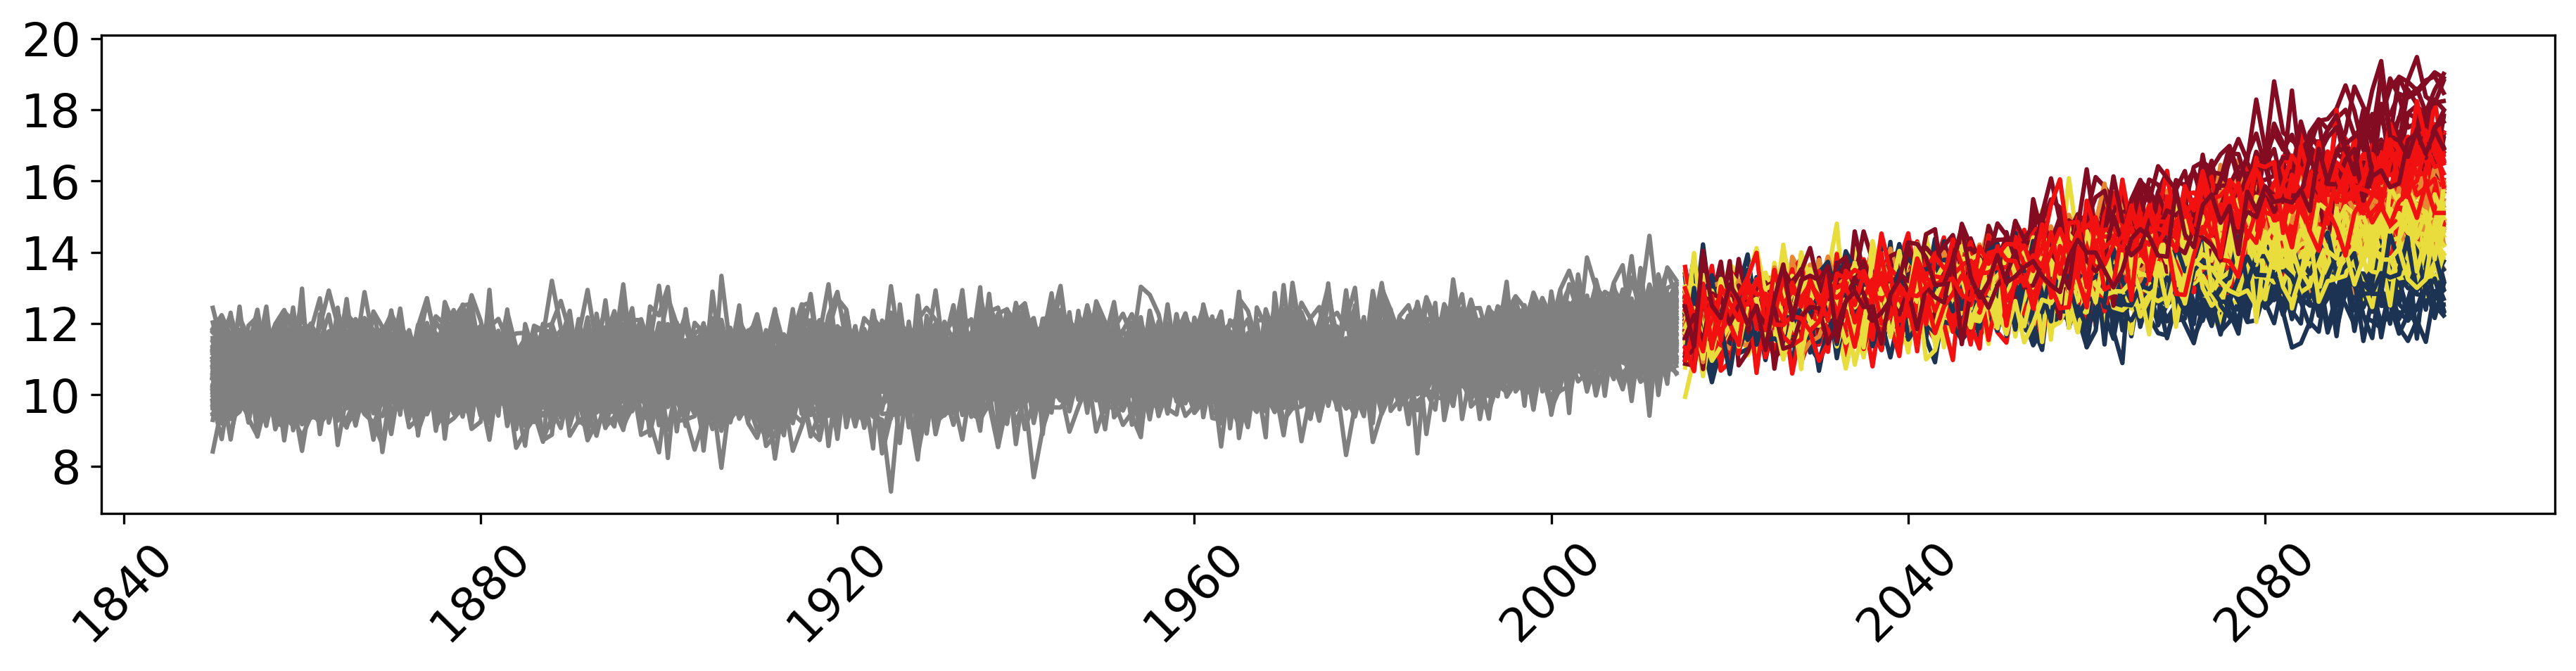

In [112]:
Image(plot)

In [76]:
files = [join('/home/nils/ramboll/paris/data/indices/tg-mean',f) for f in listdir('data/indices/tg-mean')]


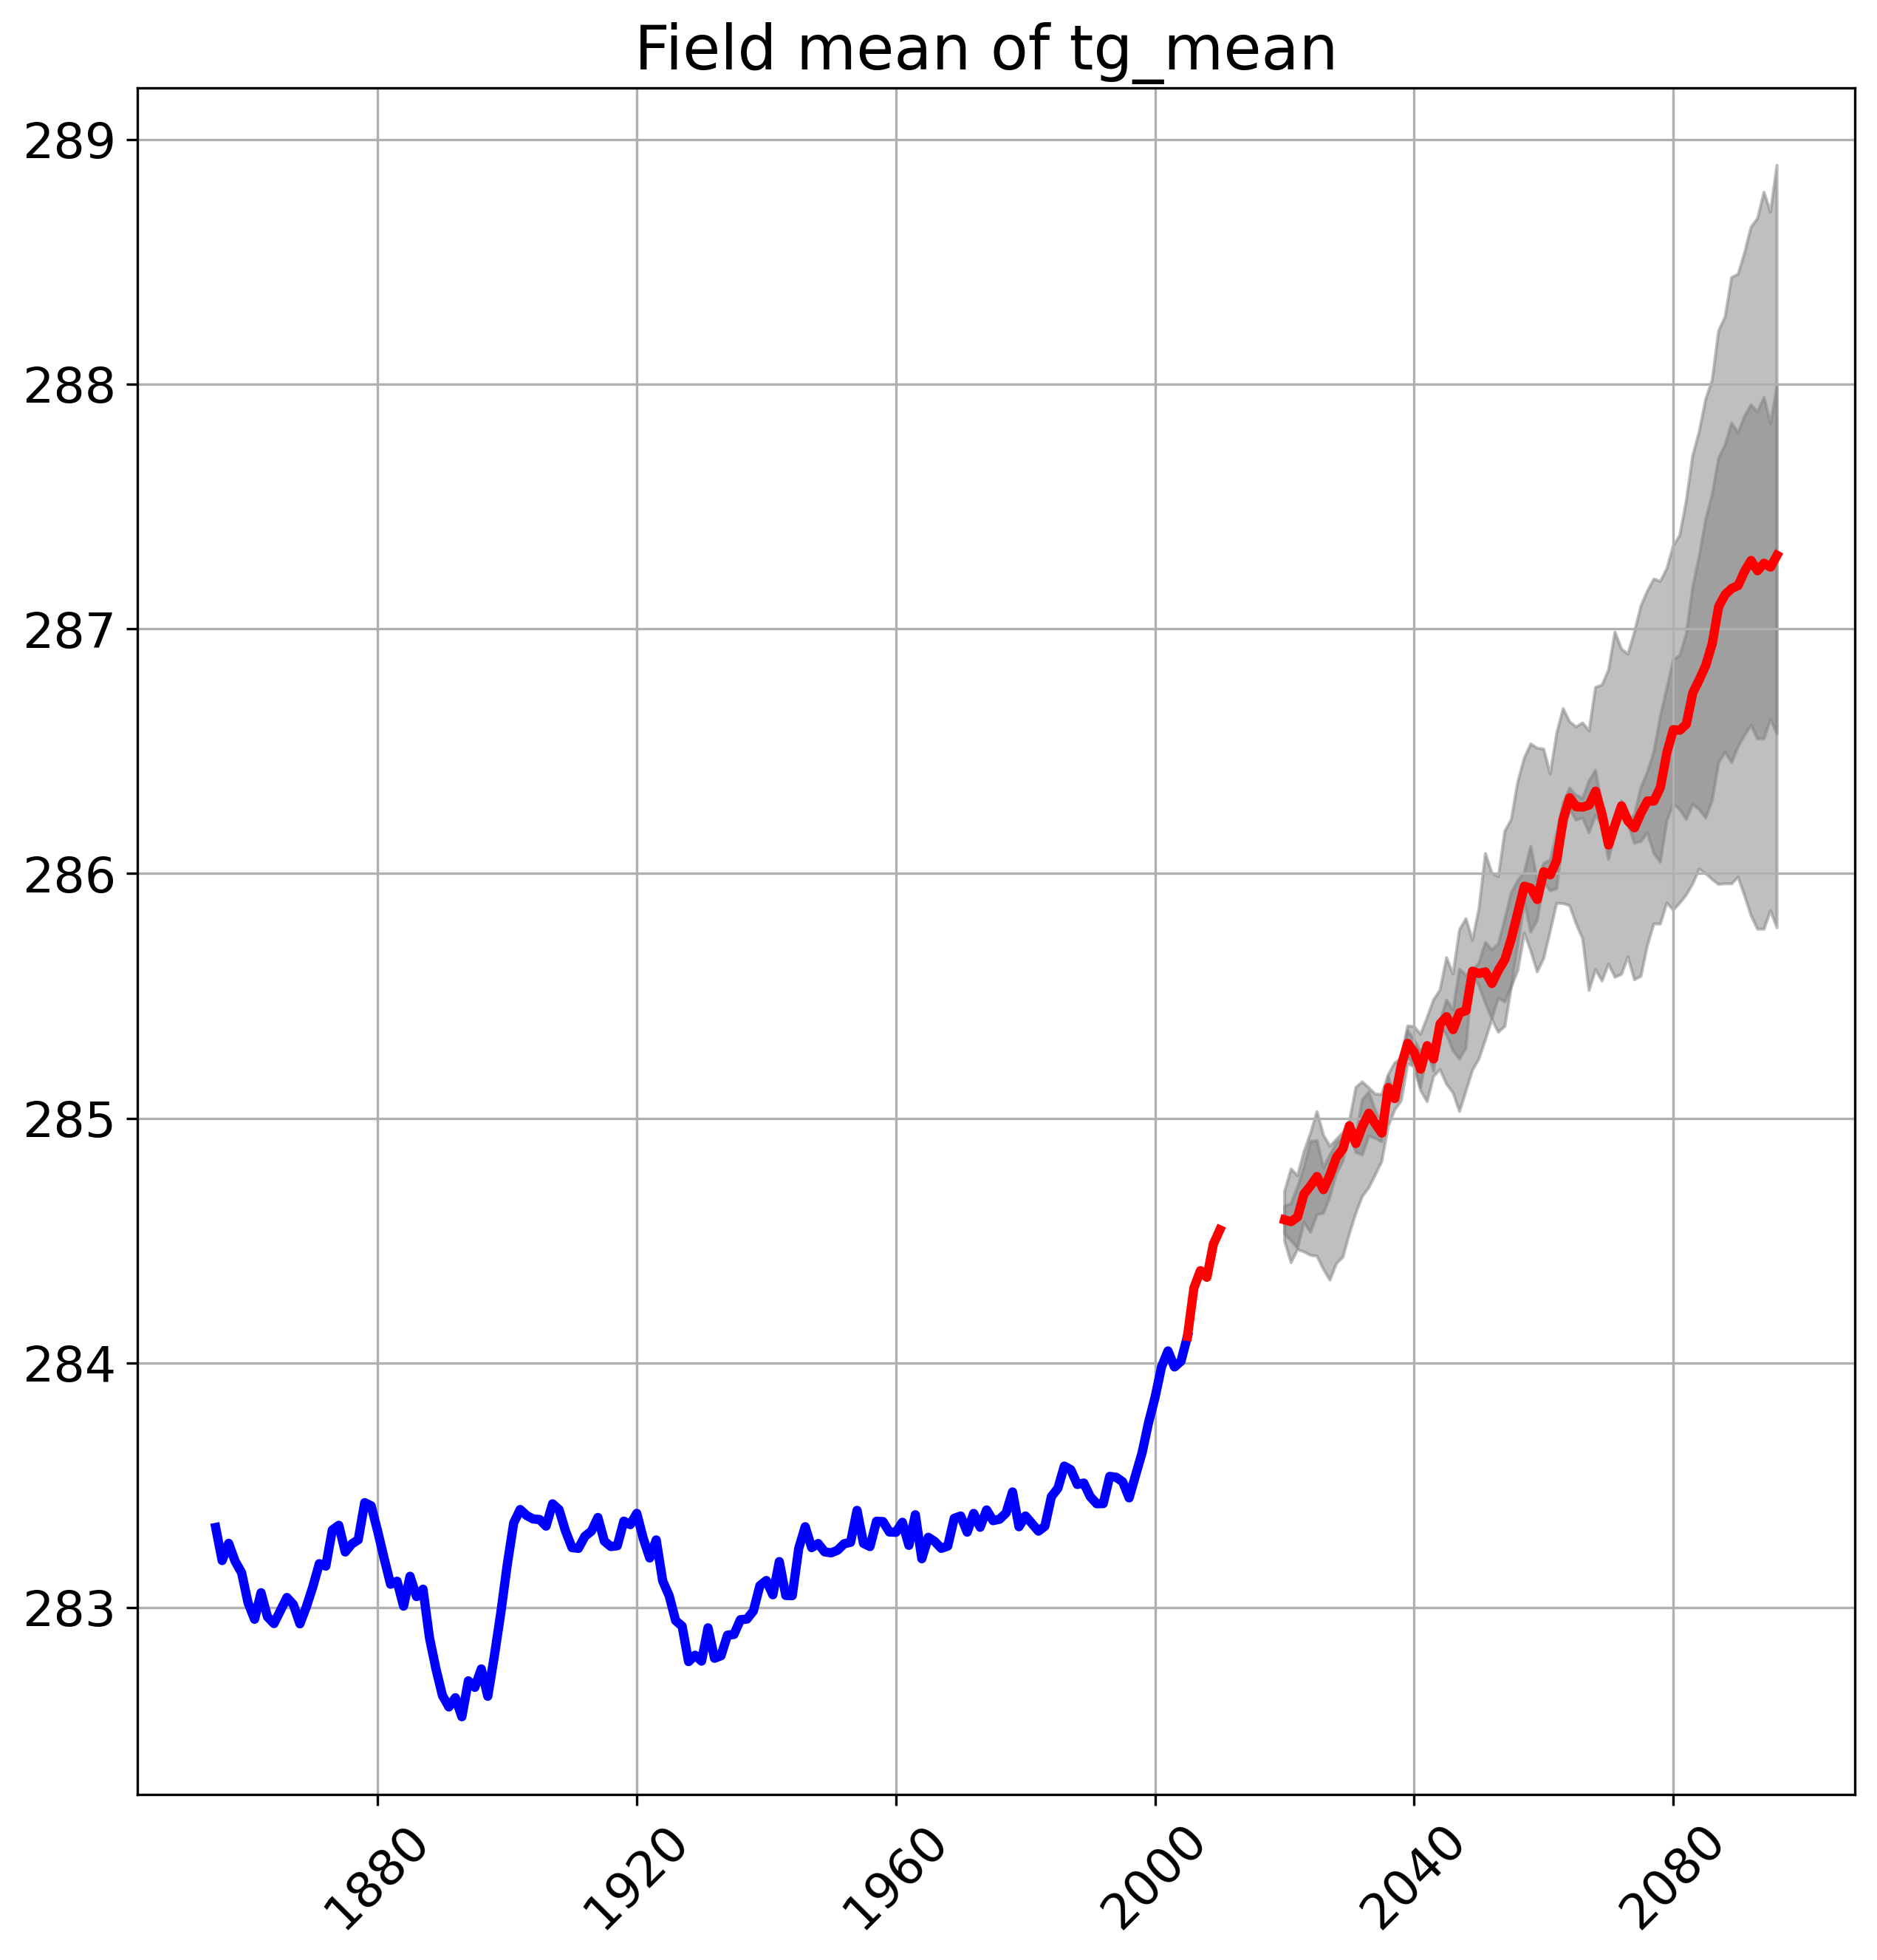

In [78]:
/home/nils/ramboll/paris/data_ajust/tas

In [84]:
out = finch.tg_mean(tas='/home/nils/ramboll/paris/data_ajust/tas/test.nc')

In [88]:
out.get()[0]

'http://localhost:8092/outputs/4537c202-dd5e-11ea-90a4-9cb6d08a53e7/out.nc'

In [14]:
               
#     if len(resource) > 1:
#         LOGGER.debug('sort_by_filename module start sorting %s files' % len(resource))
#         # LOGGER.debug('resource is list with %s files' % len(resource))
#         try:  # if len(resource) > 1:
#             # collect the different experiment names
#             


#             LOGGER.info('found %s datasets', len(nc_datasets.keys()))
#         except Exception:
#             LOGGER.exception('failed to find names of datasets!')
#         LOGGER.info('check for historical/RCP datasets')
#         
# try:
#             if historical_concatination is True:
#                 # select only necessary names
#                 rcp_datasets = nc_datasets.copy()
#                 if any("_rcp" in s for s in nc_datasets.keys()):
#                     for key in nc_datasets.keys():
#                         if 'historical' in key:
#                             rcp_datasets.pop(key)
#                     nc_datasets = rcp_datasets.copy()
#                     LOGGER.info('historical data set names removed from dictionary')
#                 else:
#                     LOGGER.info('no RCP dataset names found in dictionary')
#         except Exception:
#             LOGGER.exception('failed to pop historical data set names!')
#         LOGGER.info('start sorting the files')
#         

# try:
#             for key in nc_datasets:
#                 try:
#                     if historical_concatination is False:
#                         for n in resource:
#                             if '%s_' % key in n:
#                                 nc_datasets[key].append(path.abspath(n))  # path.join(p, n))

#                     elif historical_concatination is True:
#                         key_hist = key.replace('rcp26', 'historical').\
#                             replace('rcp45', 'historical').\
#                             replace('rcp65', 'historical').\
#                             replace('rcp85', 'historical')
#                         for n in resource:
#                             if '{}_'.format(key_hist) in n:
#                                 nc_datasets[key].append(path.abspath(n))
#                             if '{}_'.format(key) in n:
#                                 nc_datasets[key].append(path.abspath(n))  # path.join(p, n))
#                     else:
#                         LOGGER.error('append file paths to dictionary for key %s failed' % key)
#                     nc_datasets[key].sort()
#                 except Exception:
#                     LOGGER.exception('failed for %s ' % key)
#         except Exception:
#             LOGGER.exception('failed to populate the dictionary with appropriate files')
#         for key in nc_datasets.keys():
#             try:
#                 nc_datasets[key].sort()
#                 start, _ = get_timerange(nc_datasets[key][0])  # get first timestep of first file
#                 _, end = get_timerange(nc_datasets[key][-1])  # get last  timestep of last file
#                 newkey = key + '_' + start + '-' + end
#                 tmp_dic[newkey] = nc_datasets[key]
#             except Exception:
#                 msg = 'failed to sort the list of resources and add dates to keyname: %s' % key
#                 LOGGER.exception(msg)
#                 tmp_dic[key] = nc_datasets[key]
#                 # raise Exception(msg)
#     elif len(resource) == 1:
#         p, f = path.split(path.abspath(resource[0]))
#         tmp_dic[f.replace('.nc', '')] = path.abspath(resource[0])
#         LOGGER.debug('only one file! Nothing to sort, resource is passed into dictionary')
#     else:
#         LOGGER.debug('sort_by_filename module failed: resource is not 1 or >1')
#     LOGGER.info('sort_by_filename module done: %s datasets found' % len(nc_datasets))
# except Exception:
#     msg = 'failed to sort files by filename'
#     LOGGER.exception(msg)
#     raise Exception(msg)

    